# Crude Oil Impact Analysis on Indian Markets 📊🛢️

## Objective
Analyze the impact of crude oil prices on Indian stock market indices and oil sector companies using advanced data science techniques.

### Key Research Questions:
1. **Correlation Analysis**: How do WTI and Brent crude prices correlate with Indian indices?
2. **Sector Impact**: Which Indian oil companies are most sensitive to crude oil price changes?
3. **Market Dynamics**: How do currency fluctuations (USD/INR) mediate the oil-India relationship?
4. **Predictive Modeling**: Can we predict Indian market movements based on oil price patterns?
5. **Risk Assessment**: What are the volatility spillover effects?

---

In [7]:
# Essential Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Statistical Analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, normaltest
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")
print("📊 Ready for comprehensive crude oil impact analysis")

✅ All libraries imported successfully!
📊 Ready for comprehensive crude oil impact analysis


## 1. Data Loading & Initial Exploration 📁

In [8]:
# Load the comprehensive market data
print("🔄 Loading comprehensive market data...")

# Load combined dataset
df = pd.read_csv('market_data/combined_data/combined_market_data.csv', index_col=0, parse_dates=True)

# Basic dataset information
print(f"📊 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df.index.min()} to {df.index.max()}")
print(f"📈 Trading Days: {len(df)} days")
print(f"🔢 Total Instruments: {df.shape[1]}")

# Display data info
print("\n📋 Dataset Overview:")
print("=" * 60)
df.info()

print("\n🎯 Column Categories:")
print("=" * 40)

# Categorize columns
oil_cols = [col for col in df.columns if 'WTI' in col or 'BRENT' in col]
indian_indices = [col for col in df.columns if any(idx in col for idx in ['NIFTY', 'SENSEX'])]
oil_companies = [col for col in df.columns if any(comp in col for comp in ['ONGC', 'RELIANCE', 'IOC', 'BPCL', 'HPCL', 'GAIL', 'OIL', 'MGL', 'IGL'])]
currency_col = [col for col in df.columns if 'USD_INR' in col]

print(f"🛢️  Oil Prices: {len(oil_cols)} columns")
print(f"📈 Indian Indices: {len(indian_indices)} columns")
print(f"🏢 Oil Companies: {len(oil_companies)} columns")
print(f"💱 Currency: {len(currency_col)} columns")

print(f"\n✅ Data loaded successfully!")

🔄 Loading comprehensive market data...
📊 Dataset Shape: (711, 29)
📅 Date Range: 2022-01-06 00:00:00 to 2024-12-30 00:00:00
📈 Trading Days: 711 days
🔢 Total Instruments: 29

📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 711 entries, 2022-01-06 to 2024-12-30
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD_INR_Rate      711 non-null    float64
 1   WTI_Price_USD     711 non-null    float64
 2   BRENT_Price_USD   711 non-null    float64
 3   WTI_Price_INR     711 non-null    float64
 4   BRENT_Price_INR   711 non-null    float64
 5   Oil_Spread_USD    711 non-null    float64
 6   Oil_Spread_INR    711 non-null    float64
 7   NIFTY50_Price     711 non-null    float64
 8   NIFTY100_Price    711 non-null    float64
 9   NIFTY500_Price    711 non-null    float64
 10  SENSEX_Price      711 non-null    float64
 11  NIFTYBANK_Price   711 non-null    float64
 12  ONGC_Price        71

In [9]:
# Display first few rows and statistical summary
print("📋 Sample Data (Latest 5 Trading Days):")
print("=" * 60)
display(df.tail())

print("\n📊 Statistical Summary:")
print("=" * 60)
display(df.describe().round(2))

# Check for missing values
print("\n🔍 Data Quality Check:")
print("=" * 40)
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✅ No missing values found!")
else:
    print("⚠️  Missing values detected:")
    print(missing_data[missing_data > 0])

# Check data types
print(f"\n📝 Data Types:")
print("=" * 30)
print(df.dtypes.value_counts())

print(f"\n🎯 Key Market Indicators Preview:")
key_cols = ['USD_INR_Rate', 'WTI_Price_USD', 'BRENT_Price_USD', 'NIFTY50_Price', 'RELIANCE_Price']
available_key_cols = [col for col in key_cols if col in df.columns]
if available_key_cols:
    display(df[available_key_cols].tail(3).round(2))

📋 Sample Data (Latest 5 Trading Days):


,USD_INR_Rate,WTI_Price_USD,BRENT_Price_USD,WTI_Price_INR,BRENT_Price_INR,Oil_Spread_USD,Oil_Spread_INR,NIFTY50_Price,NIFTY100_Price,NIFTY500_Price,SENSEX_Price,NIFTYBANK_Price,ONGC_Price,OIL_Price,VEDL_Price,RELIANCE_Price,IOC_Price,BPCL_Price,MGL_Price,IGL_Price,GAIL_Price,MRPL_Price,NRL_Price,GSPL_Price,CASTROLIND_Price,HINDPETRO_Price,PETRONET_Price,ABAN_Price,GESHIP_Price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-23,84.945000,69.239998,72.629997,5881.591597,6169.555095,3.389999,287.963497,23753.449219,24599.750000,22412.300781,78540.171875,51317.601562,236.148666,413.220825,457.468933,1222.300049,137.779999,279.292816,1214.892212,195.050003,185.831360,142.380005,103.930000,360.700012,191.955490,403.600006,336.610168,63.560001,930.172668
2024-12-24,85.098900,70.099998,73.580002,5965.432749,6261.577206,3.480003,296.144457,23727.650391,24572.500000,22402.699219,78472.867188,51233.000000,234.285736,418.083405,454.909393,1222.750000,138.270004,282.094421,1237.641724,198.675003,189.749741,148.729996,104.989998,364.700012,194.089294,412.850006,337.352692,63.669998,948.615662
2024-12-26,85.413399,69.620003,73.260002,5946.481055,6257.385774,3.639999,310.904719,23750.199219,24611.349609,22430.349609,78472.476562,51170.699219,235.560364,419.507782,453.285065,1216.550049,137.850006,285.572296,1228.125488,195.250000,189.337784,145.639999,104.279999,364.850006,192.611282,419.299988,341.312805,62.930000,943.723572
2024-12-27,85.260902,70.599998,74.169998,6019.419580,6323.800975,3.570000,304.381396,23813.400391,24632.000000,22445.199219,78699.070312,51311.300781,232.275757,417.641357,444.080566,1221.050049,136.250000,283.591797,1227.481323,195.050003,184.423035,145.350006,103.099998,357.850006,191.495438,410.700012,337.253693,62.799999,961.824097
2024-12-30,85.386002,70.989998,74.389999,6061.552070,6351.864606,3.400002,290.312536,23644.900391,24500.750000,22357.150391,78248.132812,50952.750000,228.108704,413.859344,432.808716,1210.699951,134.610001,283.350311,1246.761353,203.649994,180.820801,142.059998,101.470001,355.350006,188.705811,405.799988,341.065308,61.950001,926.210144



📊 Statistical Summary:


,USD_INR_Rate,WTI_Price_USD,BRENT_Price_USD,WTI_Price_INR,BRENT_Price_INR,Oil_Spread_USD,Oil_Spread_INR,NIFTY50_Price,NIFTY100_Price,NIFTY500_Price,SENSEX_Price,NIFTYBANK_Price,ONGC_Price,OIL_Price,VEDL_Price,RELIANCE_Price,IOC_Price,BPCL_Price,MGL_Price,IGL_Price,GAIL_Price,MRPL_Price,NRL_Price,GSPL_Price,CASTROLIND_Price,HINDPETRO_Price,PETRONET_Price,ABAN_Price,GESHIP_Price
count,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00
mean,81.63,82.56,87.00,6716.02,7079.25,4.44,363.23,19882.62,20218.72,17659.13,66258.68,43803.53,180.43,249.29,263.58,1245.41,102.03,200.86,1076.34,208.22,128.10,111.90,80.62,290.44,143.03,225.59,234.77,53.87,728.86
std,2.70,12.05,11.91,810.09,796.64,1.57,127.52,2867.49,3197.62,3284.97,8872.14,5461.86,63.22,161.52,96.03,143.76,42.12,68.56,335.50,28.17,50.25,63.79,17.22,52.64,50.98,97.30,55.37,11.81,305.71
min,73.80,65.75,69.19,5514.25,5810.64,-0.68,-52.65,15293.50,15445.80,12994.73,51360.42,32616.72,99.32,98.70,134.10,1008.88,58.22,129.13,633.00,153.82,74.36,36.77,40.08,204.10,85.03,124.86,171.25,31.75,264.47
25%,81.14,73.83,78.49,6110.27,6495.07,3.55,293.71,17601.75,17664.62,14970.82,59282.52,39541.04,131.03,129.52,201.17,1136.38,68.11,148.86,811.50,190.51,85.94,57.94,67.39,257.91,103.34,151.71,195.71,45.35,486.22
50%,82.71,79.48,84.07,6534.54,6920.03,4.28,354.14,19047.25,18996.10,16553.75,63874.93,43886.50,150.79,162.56,226.29,1199.88,81.37,161.14,991.58,206.14,101.73,85.07,77.83,278.99,118.42,168.63,206.29,50.75,695.97
75%,83.35,87.11,92.25,7048.26,7479.66,5.35,438.63,22287.50,22914.90,20404.10,73433.09,47837.97,250.20,392.47,268.59,1355.86,144.43,281.09,1283.80,225.70,180.52,168.67,90.67,314.97,186.94,322.88,274.23,63.44,952.40
max,85.41,123.70,127.98,9534.90,9864.80,11.39,906.32,26216.05,27256.25,24496.90,85836.12,54375.35,324.54,723.37,504.65,1595.48,184.68,357.40,1947.78,275.79,230.86,270.50,138.72,455.40,269.03,448.50,369.78,88.60,1403.62



🔍 Data Quality Check:
✅ No missing values found!

📝 Data Types:
float64    29
Name: count, dtype: int64

🎯 Key Market Indicators Preview:


,USD_INR_Rate,WTI_Price_USD,BRENT_Price_USD,NIFTY50_Price,RELIANCE_Price
Date,,,,,
2024-12-26,85.41,69.62,73.26,23750.2,1216.55
2024-12-27,85.26,70.60,74.17,23813.4,1221.05
2024-12-30,85.39,70.99,74.39,23644.9,1210.70


## 2. Time Series Visualization 📈

In [10]:
# Create comprehensive time series visualizations
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=[
        'Crude Oil Prices (USD)', 'Crude Oil Prices (INR)',
        'Indian Stock Indices', 'USD/INR Exchange Rate',
        'Major Oil Companies', 'Oil Price Spread (Brent-WTI)',
        'Normalized Price Comparison', 'Volatility Analysis'
    ],
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": True}, {"secondary_y": False}],
           [{"secondary_y": True}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]],
    vertical_spacing=0.08,
    horizontal_spacing=0.1
)

# 1. Crude Oil Prices (USD)
if 'WTI_Price_USD' in df.columns and 'BRENT_Price_USD' in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df['WTI_Price_USD'], name='WTI (USD)', 
                           line=dict(color='blue', width=2)), row=1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['BRENT_Price_USD'], name='Brent (USD)', 
                           line=dict(color='red', width=2)), row=1, col=1)

# 2. Crude Oil Prices (INR)
if 'WTI_Price_INR' in df.columns and 'BRENT_Price_INR' in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df['WTI_Price_INR'], name='WTI (INR)', 
                           line=dict(color='lightblue', width=2)), row=1, col=2)
    fig.add_trace(go.Scatter(x=df.index, y=df['BRENT_Price_INR'], name='Brent (INR)', 
                           line=dict(color='lightcoral', width=2)), row=1, col=2)

# 3. Indian Stock Indices
for i, idx in enumerate(['NIFTY50_Price', 'SENSEX_Price', 'NIFTYBANK_Price']):
    if idx in df.columns:
        colors = ['green', 'orange', 'purple']
        fig.add_trace(go.Scatter(x=df.index, y=df[idx], name=idx.replace('_Price', ''),
                               line=dict(color=colors[i], width=2)), row=2, col=1)

# 4. USD/INR Exchange Rate
if 'USD_INR_Rate' in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df['USD_INR_Rate'], name='USD/INR',
                           line=dict(color='gold', width=2)), row=2, col=2)

# 5. Major Oil Companies
oil_companies_to_plot = ['RELIANCE_Price', 'ONGC_Price', 'IOC_Price', 'BPCL_Price']
colors_companies = ['darkred', 'darkgreen', 'darkblue', 'darkorange']
for i, company in enumerate(oil_companies_to_plot):
    if company in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[company], 
                               name=company.replace('_Price', ''),
                               line=dict(color=colors_companies[i], width=2)), row=3, col=1)

# 6. Oil Price Spread
if 'Oil_Spread_USD' in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df['Oil_Spread_USD'], name='Brent-WTI Spread',
                           line=dict(color='brown', width=2)), row=3, col=2)

# 7. Normalized Comparison (all series scaled 0-1)
normalize_cols = ['WTI_Price_USD', 'BRENT_Price_USD', 'NIFTY50_Price', 'RELIANCE_Price']
normalize_cols = [col for col in normalize_cols if col in df.columns]
if normalize_cols:
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(df[normalize_cols]), 
                                 index=df.index, columns=normalize_cols)
    for col in normalized_data.columns:
        fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[col], 
                               name=f'{col.replace("_Price", "").replace("_USD", "")} (Normalized)',
                               line=dict(width=2)), row=4, col=1)

# 8. Rolling Volatility (30-day)
vol_cols = ['WTI_Price_USD', 'NIFTY50_Price']
vol_cols = [col for col in vol_cols if col in df.columns]
for col in vol_cols:
    volatility = df[col].pct_change().rolling(30).std() * np.sqrt(252) * 100
    fig.add_trace(go.Scatter(x=df.index, y=volatility, 
                           name=f'{col.replace("_Price", "").replace("_USD", "")} Volatility (%)',
                           line=dict(width=2)), row=4, col=2)

# Update layout
fig.update_layout(
    height=1600,
    title_text="<b>Comprehensive Oil Market & Indian Economy Analysis</b>",
    title_x=0.5,
    showlegend=True,
    template="plotly_white"
)

# Update y-axis labels
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Price (INR)", row=1, col=2)
fig.update_yaxes(title_text="Index Value", row=2, col=1)
fig.update_yaxes(title_text="Exchange Rate", row=2, col=2)
fig.update_yaxes(title_text="Stock Price (INR)", row=3, col=1)
fig.update_yaxes(title_text="Spread (USD)", row=3, col=2)
fig.update_yaxes(title_text="Normalized (0-1)", row=4, col=1)
fig.update_yaxes(title_text="Volatility (%)", row=4, col=2)

fig.show()

print("📊 Time series analysis complete!")

📊 Time series analysis complete!


## 3. Correlation Analysis 🔗

🔍 Performing comprehensive correlation analysis...


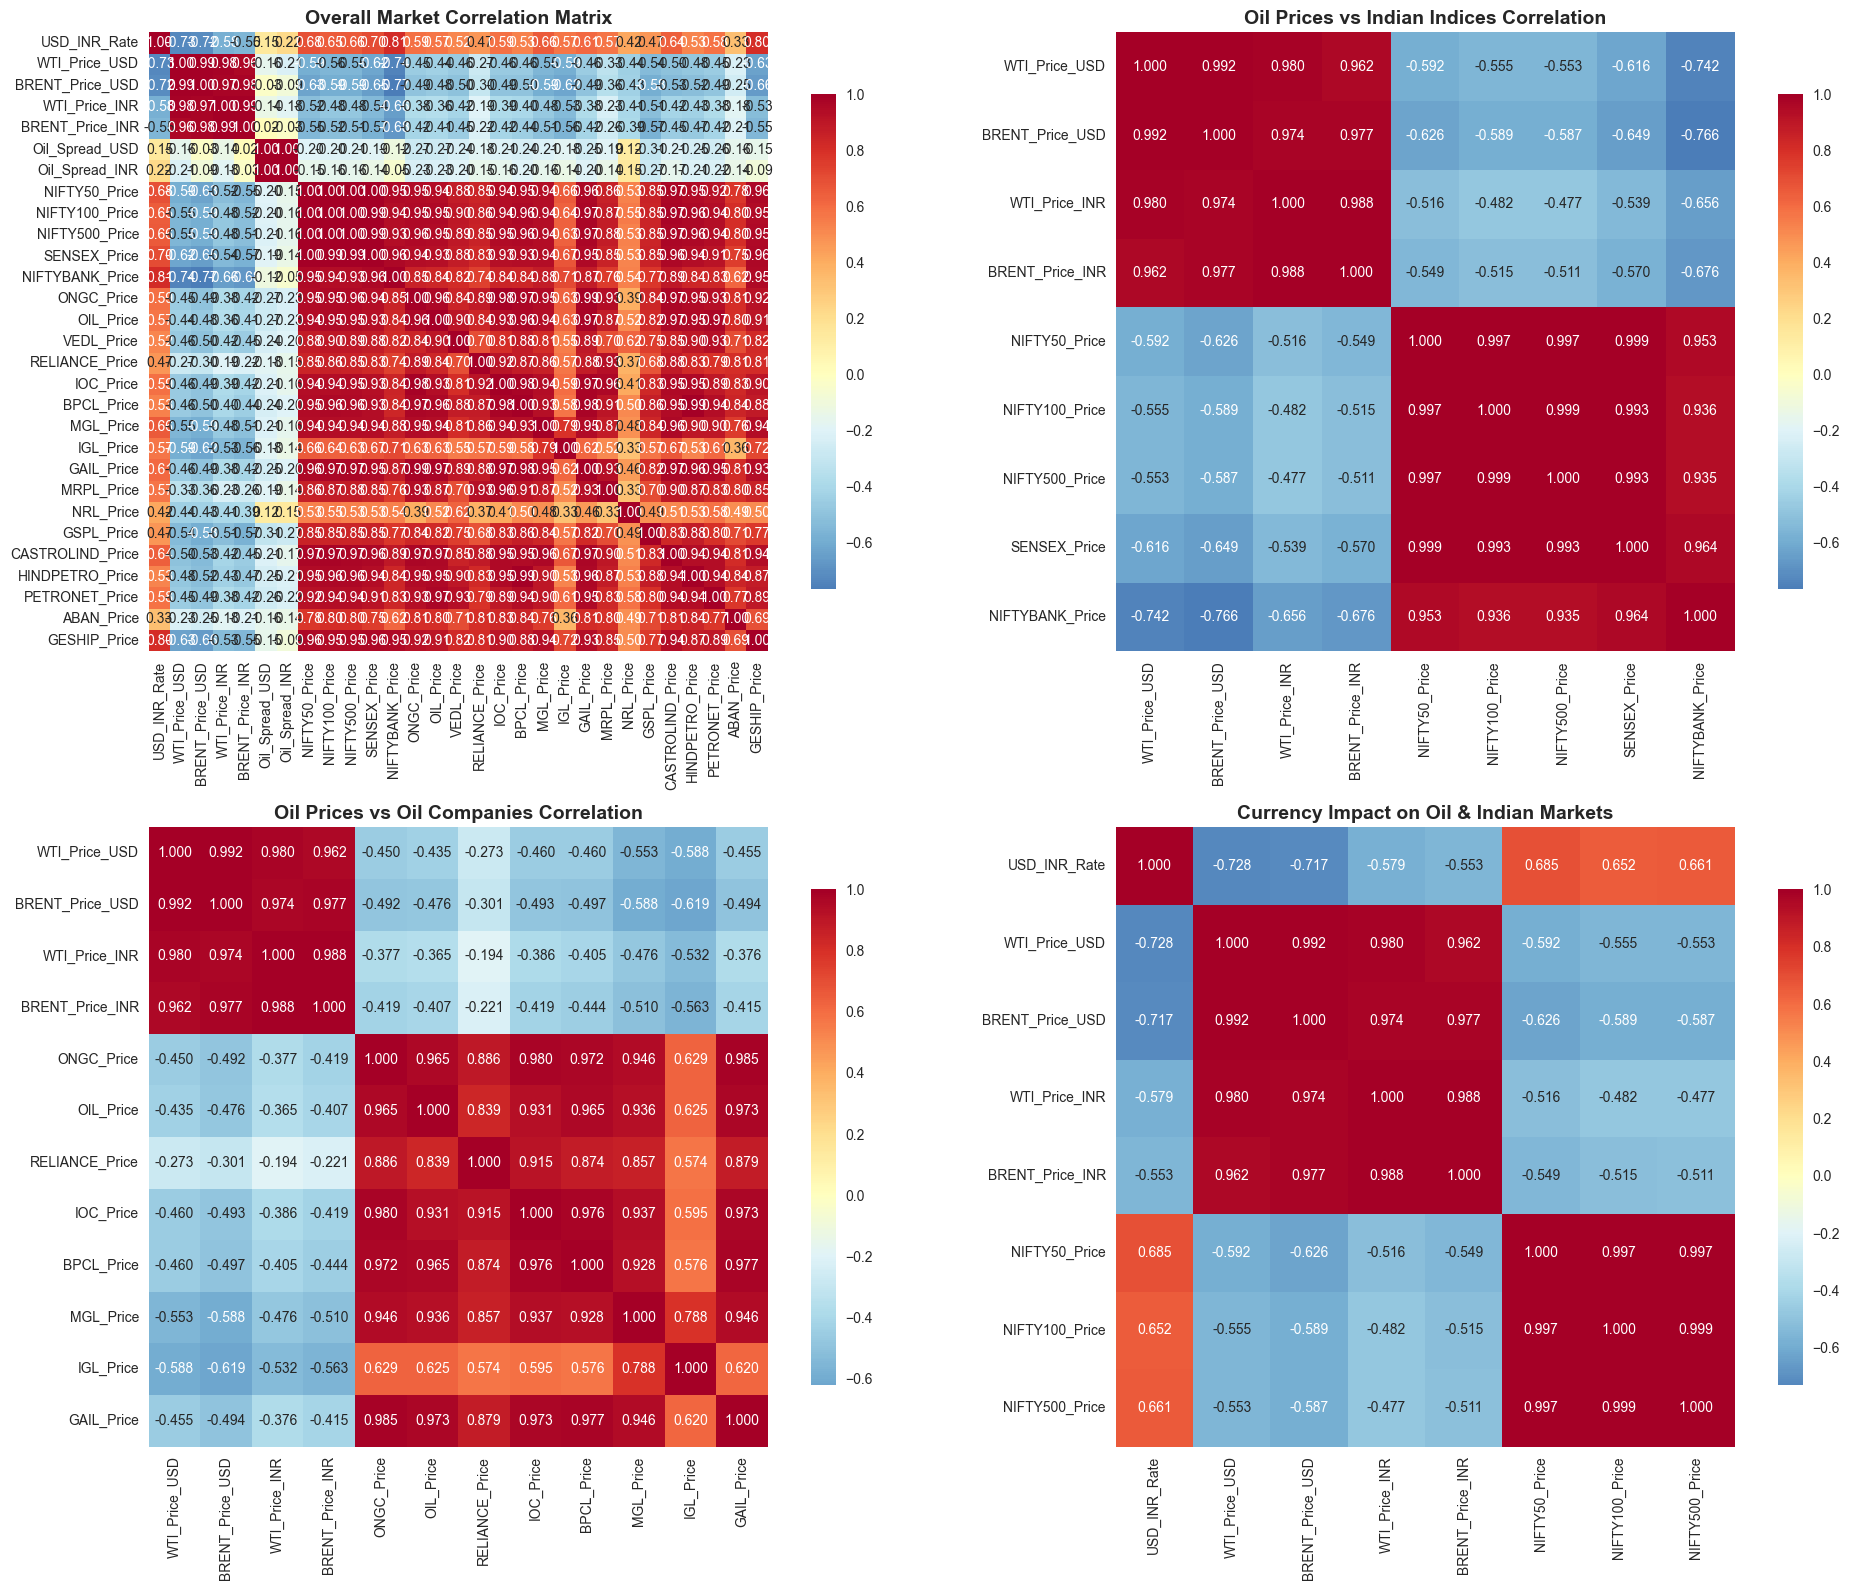


📊 Statistical Significance of Key Correlations:
WTI ↔ NIFTY50:
  Correlation: -0.5922 (***) - Moderate relationship
BRENT ↔ NIFTY50:
  Correlation: -0.6256 (***) - Moderate relationship
WTI ↔ NIFTY50:
  Correlation: -0.5164 (***) - Moderate relationship
BRENT ↔ SENSEX:
  Correlation: -0.5704 (***) - Moderate relationship
USD_Rate ↔ NIFTY50:
  Correlation: 0.6850 (***) - Moderate relationship
WTI ↔ RELIANCE:
  Correlation: -0.2732 (***) - Weak relationship
BRENT ↔ ONGC:
  Correlation: -0.4916 (***) - Moderate relationship
USD_Rate ↔ WTI:
  Correlation: -0.5787 (***) - Moderate relationship

📋 Correlation Summary Table:


,Pair,Correlation,P-value,Significance,Interpretation
0,WTI_Price_USD ↔ NIFTY50_Price,-0.5922,0.0000,***,Moderate
1,BRENT_Price_USD ↔ NIFTY50_Price,-0.6256,0.0000,***,Moderate
2,WTI_Price_INR ↔ NIFTY50_Price,-0.5164,0.0000,***,Moderate
3,BRENT_Price_INR ↔ SENSEX_Price,-0.5704,0.0000,***,Moderate
4,USD_INR_Rate ↔ NIFTY50_Price,0.6850,0.0000,***,Moderate
5,WTI_Price_USD ↔ RELIANCE_Price,-0.2732,0.0000,***,Weak
6,BRENT_Price_USD ↔ ONGC_Price,-0.4916,0.0000,***,Moderate
7,USD_INR_Rate ↔ WTI_Price_INR,-0.5787,0.0000,***,Moderate



📝 Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [11]:
# Comprehensive Correlation Analysis
print("🔍 Performing comprehensive correlation analysis...")

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create focused correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Overall Correlation Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Overall Market Correlation Matrix', fontsize=14, fontweight='bold')

# 2. Oil vs Indian Indices Correlation
oil_indices_cols = oil_cols + indian_indices
if len(oil_indices_cols) > 1:
    oil_indices_corr = df[oil_indices_cols].corr()
    sns.heatmap(oil_indices_corr, annot=True, cmap='RdYlBu_r', center=0,
                fmt='.3f', square=True, ax=axes[0,1], cbar_kws={'shrink': 0.8})
    axes[0,1].set_title('Oil Prices vs Indian Indices Correlation', fontsize=14, fontweight='bold')

# 3. Oil vs Oil Companies Correlation
oil_companies_subset = [col for col in oil_companies if col in df.columns][:8]  # Top 8 companies
oil_company_cols = oil_cols + oil_companies_subset
if len(oil_company_cols) > 1:
    oil_company_corr = df[oil_company_cols].corr()
    sns.heatmap(oil_company_corr, annot=True, cmap='RdYlBu_r', center=0,
                fmt='.3f', square=True, ax=axes[1,0], cbar_kws={'shrink': 0.8})
    axes[1,0].set_title('Oil Prices vs Oil Companies Correlation', fontsize=14, fontweight='bold')

# 4. Currency Impact Analysis
currency_impact_cols = ['USD_INR_Rate'] + oil_cols + indian_indices[:3]
currency_impact_cols = [col for col in currency_impact_cols if col in df.columns]
if len(currency_impact_cols) > 1:
    currency_corr = df[currency_impact_cols].corr()
    sns.heatmap(currency_corr, annot=True, cmap='RdYlBu_r', center=0,
                fmt='.3f', square=True, ax=axes[1,1], cbar_kws={'shrink': 0.8})
    axes[1,1].set_title('Currency Impact on Oil & Indian Markets', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical Significance Testing
print("\n📊 Statistical Significance of Key Correlations:")
print("=" * 60)

def correlation_with_significance(col1, col2, data):
    """Calculate correlation with statistical significance"""
    if col1 in data.columns and col2 in data.columns:
        corr, p_value = pearsonr(data[col1].dropna(), data[col2].dropna())
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        return corr, p_value, significance
    return None, None, None

# Key correlation pairs to analyze
key_pairs = [
    ('WTI_Price_USD', 'NIFTY50_Price'),
    ('BRENT_Price_USD', 'NIFTY50_Price'),
    ('WTI_Price_INR', 'NIFTY50_Price'),
    ('BRENT_Price_INR', 'SENSEX_Price'),
    ('USD_INR_Rate', 'NIFTY50_Price'),
    ('WTI_Price_USD', 'RELIANCE_Price'),
    ('BRENT_Price_USD', 'ONGC_Price'),
    ('USD_INR_Rate', 'WTI_Price_INR')
]

correlation_results = []
for col1, col2 in key_pairs:
    corr, p_val, sig = correlation_with_significance(col1, col2, df)
    if corr is not None:
        correlation_results.append({
            'Pair': f'{col1} ↔ {col2}',
            'Correlation': f'{corr:.4f}',
            'P-value': f'{p_val:.4f}',
            'Significance': sig,
            'Interpretation': 'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'
        })
        print(f"{col1.replace('_Price', '').replace('_USD', '').replace('_INR', '')} ↔ {col2.replace('_Price', '').replace('_USD', '').replace('_INR', '')}:")
        print(f"  Correlation: {corr:.4f} ({sig}) - {('Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak')} relationship")

# Create correlation results DataFrame
if correlation_results:
    corr_df = pd.DataFrame(correlation_results)
    print(f"\n📋 Correlation Summary Table:")
    display(corr_df)

print(f"\n📝 Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")

📈 Analyzing dynamic correlations over time...


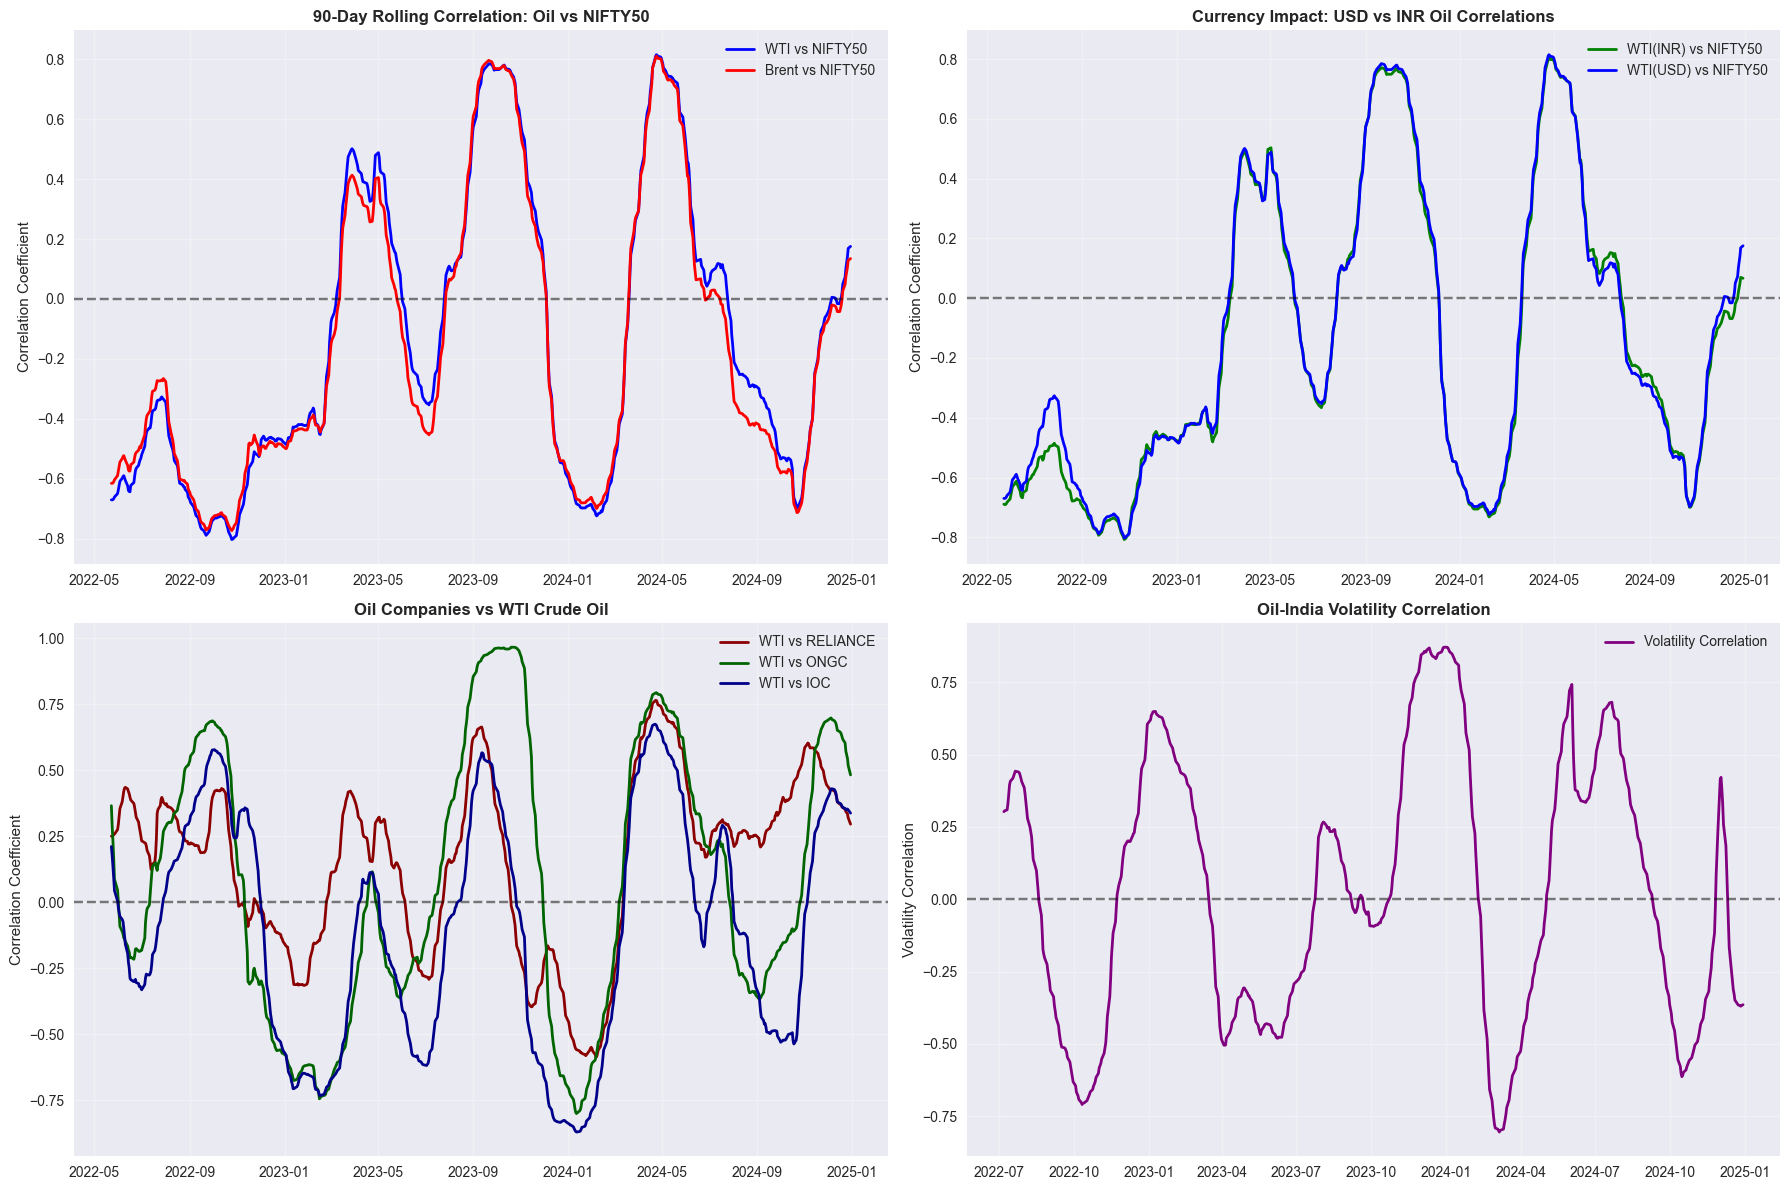

🔍 Dynamic correlation analysis complete with 90-day rolling window


In [12]:
# Rolling Correlation Analysis - Dynamic Relationships Over Time
print("📈 Analyzing dynamic correlations over time...")

# Calculate rolling correlations
window = 90  # 3-month rolling window

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Oil vs NIFTY50 Rolling Correlation
if 'WTI_Price_USD' in df.columns and 'NIFTY50_Price' in df.columns:
    rolling_corr_oil_nifty = df['WTI_Price_USD'].rolling(window).corr(df['NIFTY50_Price'])
    axes[0,0].plot(rolling_corr_oil_nifty.index, rolling_corr_oil_nifty, 
                   color='blue', linewidth=2, label='WTI vs NIFTY50')
    
    if 'BRENT_Price_USD' in df.columns:
        rolling_corr_brent_nifty = df['BRENT_Price_USD'].rolling(window).corr(df['NIFTY50_Price'])
        axes[0,0].plot(rolling_corr_brent_nifty.index, rolling_corr_brent_nifty, 
                       color='red', linewidth=2, label='Brent vs NIFTY50')
    
    axes[0,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[0,0].set_title(f'{window}-Day Rolling Correlation: Oil vs NIFTY50', fontweight='bold')
    axes[0,0].set_ylabel('Correlation Coefficient')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

# 2. Currency Impact on Oil-India Relationship
if 'USD_INR_Rate' in df.columns and 'WTI_Price_INR' in df.columns and 'NIFTY50_Price' in df.columns:
    rolling_corr_inr = df['WTI_Price_INR'].rolling(window).corr(df['NIFTY50_Price'])
    rolling_corr_usd = df['WTI_Price_USD'].rolling(window).corr(df['NIFTY50_Price'])
    
    axes[0,1].plot(rolling_corr_inr.index, rolling_corr_inr, 
                   color='green', linewidth=2, label='WTI(INR) vs NIFTY50')
    axes[0,1].plot(rolling_corr_usd.index, rolling_corr_usd, 
                   color='blue', linewidth=2, label='WTI(USD) vs NIFTY50')
    
    axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[0,1].set_title('Currency Impact: USD vs INR Oil Correlations', fontweight='bold')
    axes[0,1].set_ylabel('Correlation Coefficient')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# 3. Oil Companies vs Crude Oil
oil_companies_major = ['RELIANCE_Price', 'ONGC_Price', 'IOC_Price']
oil_companies_major = [col for col in oil_companies_major if col in df.columns]
colors = ['darkred', 'darkgreen', 'darkblue']

for i, company in enumerate(oil_companies_major):
    if 'WTI_Price_USD' in df.columns:
        rolling_corr = df['WTI_Price_USD'].rolling(window).corr(df[company])
        axes[1,0].plot(rolling_corr.index, rolling_corr, 
                       color=colors[i], linewidth=2, 
                       label=f"WTI vs {company.replace('_Price', '')}")

axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1,0].set_title('Oil Companies vs WTI Crude Oil', fontweight='bold')
axes[1,0].set_ylabel('Correlation Coefficient')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Volatility Correlation
if 'WTI_Price_USD' in df.columns and 'NIFTY50_Price' in df.columns:
    # Calculate rolling volatilities
    oil_vol = df['WTI_Price_USD'].pct_change().rolling(30).std() * np.sqrt(252)
    nifty_vol = df['NIFTY50_Price'].pct_change().rolling(30).std() * np.sqrt(252)
    
    vol_corr = oil_vol.rolling(window).corr(nifty_vol)
    axes[1,1].plot(vol_corr.index, vol_corr, color='purple', linewidth=2, 
                   label='Volatility Correlation')
    
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1,1].set_title('Oil-India Volatility Correlation', fontweight='bold')
    axes[1,1].set_ylabel('Volatility Correlation')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🔍 Dynamic correlation analysis complete with {window}-day rolling window")

## 4. Lead-Lag Analysis & Causality Testing 🔄

🔄 Performing lead-lag analysis...


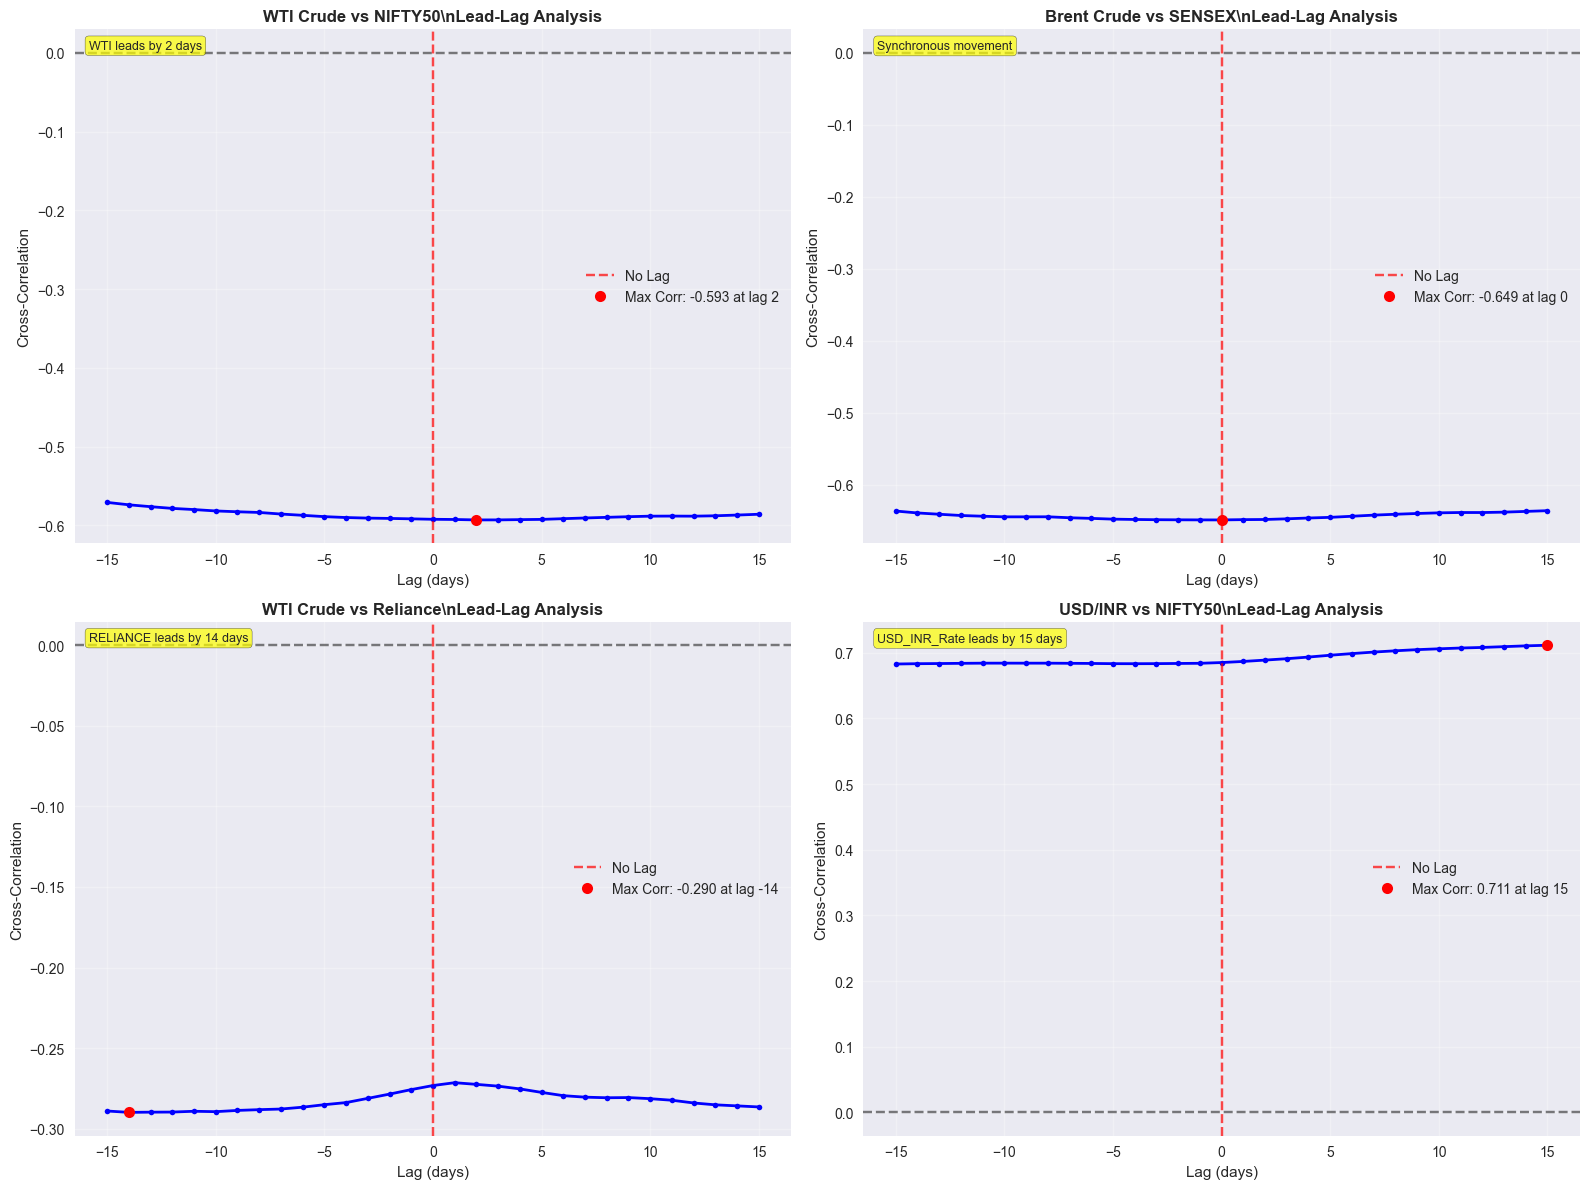

\n📊 Granger Causality Analysis:
WTI ↔ NIFTY50:
  WTI → NIFTY50: No (p=0.2742)
  NIFTY50 → WTI: No (p=0.0646)

BRENT ↔ NIFTY50:
  BRENT → NIFTY50: No (p=0.4034)
  NIFTY50 → BRENT: Yes* (p=0.0318)

USD_INR_Rate ↔ NIFTY50:
  USD_INR_Rate → NIFTY50: Yes* (p=0.0181)
  NIFTY50 → USD_INR_Rate: Yes*** (p=0.0000)

WTI ↔ RELIANCE:
  WTI → RELIANCE: Yes** (p=0.0058)
  RELIANCE → WTI: No (p=0.3132)

BRENT ↔ ONGC:
  BRENT → ONGC: Yes*** (p=0.0000)
  ONGC → BRENT: No (p=0.0664)

📋 Granger Causality Summary:


,X Variable,Y Variable,X → Y (p-value),Y → X (p-value),X Causes Y,Y Causes X
0,WTI,NIFTY50,0.2742,0.0646,No,No
1,BRENT,NIFTY50,0.4034,0.0318,No,Yes*
2,USD_INR_Rate,NIFTY50,0.0181,0.0000,Yes*,Yes***
3,WTI,RELIANCE,0.0058,0.3132,Yes**,No
4,BRENT,ONGC,0.0000,0.0664,Yes***,No


\n📝 Significance: *** p<0.001, ** p<0.01, * p<0.05
🔍 Lead-lag and causality analysis complete!


In [13]:
# Lead-Lag Analysis: Which market leads and which follows?
print("🔄 Performing lead-lag analysis...")

def cross_correlation_analysis(x, y, max_lags=20):
    """Calculate cross-correlation between two series with different lags"""
    correlations = []
    lags = list(range(-max_lags, max_lags + 1))
    
    for lag in lags:
        if lag < 0:
            # y leads x (x lags behind y)
            corr = np.corrcoef(x.iloc[-lag:], y.iloc[:lag])[0, 1]
        elif lag > 0:
            # x leads y (y lags behind x)
            corr = np.corrcoef(x.iloc[:-lag], y.iloc[lag:])[0, 1]
        else:
            # No lag
            corr = np.corrcoef(x, y)[0, 1]
        
        correlations.append(corr)
    
    return lags, correlations

# Perform lead-lag analysis for key pairs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

lead_lag_pairs = [
    ('WTI_Price_USD', 'NIFTY50_Price', 'WTI Crude vs NIFTY50'),
    ('BRENT_Price_USD', 'SENSEX_Price', 'Brent Crude vs SENSEX'),
    ('WTI_Price_USD', 'RELIANCE_Price', 'WTI Crude vs Reliance'),
    ('USD_INR_Rate', 'NIFTY50_Price', 'USD/INR vs NIFTY50')
]

for i, (x_col, y_col, title) in enumerate(lead_lag_pairs):
    if x_col in df.columns and y_col in df.columns:
        ax = axes[i//2, i%2]
        
        # Clean data (remove NaN values)
        clean_data = df[[x_col, y_col]].dropna()
        x_series = clean_data[x_col]
        y_series = clean_data[y_col]
        
        lags, correlations = cross_correlation_analysis(x_series, y_series, max_lags=15)
        
        # Plot cross-correlation
        ax.plot(lags, correlations, 'bo-', linewidth=2, markersize=4)
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='No Lag')
        
        # Find maximum correlation and its lag
        max_corr_idx = np.argmax(np.abs(correlations))
        max_lag = lags[max_corr_idx]
        max_corr = correlations[max_corr_idx]
        
        ax.plot(max_lag, max_corr, 'ro', markersize=8, label=f'Max Corr: {max_corr:.3f} at lag {max_lag}')
        
        ax.set_title(f'{title}\\nLead-Lag Analysis', fontweight='bold')
        ax.set_xlabel('Lag (days)')
        ax.set_ylabel('Cross-Correlation')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Interpretation
        if max_lag < 0:
            interpretation = f"{y_col.replace('_Price', '').replace('_USD', '')} leads by {abs(max_lag)} days"
        elif max_lag > 0:
            interpretation = f"{x_col.replace('_Price', '').replace('_USD', '')} leads by {max_lag} days"
        else:
            interpretation = "Synchronous movement"
        
        ax.text(0.02, 0.98, interpretation, transform=ax.transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

# Granger Causality Test
print("\\n📊 Granger Causality Analysis:")
print("=" * 50)

def perform_granger_causality(x, y, max_lags=5):
    """Perform Granger causality test"""
    try:
        # Prepare data - both series must be stationary
        data = pd.DataFrame({'x': x, 'y': y}).dropna()
        
        # Check if we have enough data
        if len(data) < 50:
            return None, "Insufficient data"
        
        # Test y -> x (does y Granger-cause x?)
        try:
            result_yx = grangercausalitytests(data[['x', 'y']], max_lags, verbose=False)
            
            # Extract p-values for different lags
            p_values_yx = []
            for lag in range(1, max_lags + 1):
                if lag in result_yx:
                    p_val = result_yx[lag][0]['ssr_ftest'][1]  # F-test p-value
                    p_values_yx.append(p_val)
            
            min_p_yx = min(p_values_yx) if p_values_yx else 1.0
            
        except:
            min_p_yx = 1.0
        
        # Test x -> y (does x Granger-cause y?)
        try:
            result_xy = grangercausalitytests(data[['y', 'x']], max_lags, verbose=False)
            
            p_values_xy = []
            for lag in range(1, max_lags + 1):
                if lag in result_xy:
                    p_val = result_xy[lag][0]['ssr_ftest'][1]  # F-test p-value
                    p_values_xy.append(p_val)
            
            min_p_xy = min(p_values_xy) if p_values_xy else 1.0
            
        except:
            min_p_xy = 1.0
        
        return (min_p_yx, min_p_xy), "Success"
        
    except Exception as e:
        return None, f"Error: {str(e)}"

# Test Granger causality for key relationships
granger_pairs = [
    ('WTI_Price_USD', 'NIFTY50_Price'),
    ('BRENT_Price_USD', 'NIFTY50_Price'),
    ('USD_INR_Rate', 'NIFTY50_Price'),
    ('WTI_Price_USD', 'RELIANCE_Price'),
    ('BRENT_Price_USD', 'ONGC_Price')
]

granger_results = []
for x_col, y_col in granger_pairs:
    if x_col in df.columns and y_col in df.columns:
        result, status = perform_granger_causality(df[x_col], df[y_col])
        
        if result is not None:
            p_yx, p_xy = result
            
            # Interpretation
            causes_xy = "Yes***" if p_xy < 0.001 else "Yes**" if p_xy < 0.01 else "Yes*" if p_xy < 0.05 else "No"
            causes_yx = "Yes***" if p_yx < 0.001 else "Yes**" if p_yx < 0.01 else "Yes*" if p_yx < 0.05 else "No"
            
            granger_results.append({
                'X Variable': x_col.replace('_Price', '').replace('_USD', ''),
                'Y Variable': y_col.replace('_Price', '').replace('_USD', ''),
                'X → Y (p-value)': f"{p_xy:.4f}",
                'Y → X (p-value)': f"{p_yx:.4f}",
                'X Causes Y': causes_xy,
                'Y Causes X': causes_yx
            })
            
            print(f"{x_col.replace('_Price', '').replace('_USD', '')} ↔ {y_col.replace('_Price', '').replace('_USD', '')}:")
            print(f"  {x_col.replace('_Price', '').replace('_USD', '')} → {y_col.replace('_Price', '').replace('_USD', '')}: {causes_xy} (p={p_xy:.4f})")
            print(f"  {y_col.replace('_Price', '').replace('_USD', '')} → {x_col.replace('_Price', '').replace('_USD', '')}: {causes_yx} (p={p_yx:.4f})")
            print()

# Display Granger causality results
if granger_results:
    granger_df = pd.DataFrame(granger_results)
    print("📋 Granger Causality Summary:")
    display(granger_df)

print("\\n📝 Significance: *** p<0.001, ** p<0.01, * p<0.05")
print("🔍 Lead-lag and causality analysis complete!")

## 5. Oil Company Sector Analysis 🏢

🏢 Analyzing oil company sensitivity to crude oil prices...
📊 Analyzing 8 oil companies
📋 Oil Company Sensitivity Rankings:


,Company,Oil_Sensitivity_Beta,Correlation,R_Squared,Data_Points,Sensitivity_Level
1,OIL,0.0998,0.0912,0.0083,710,Low
0,ONGC,0.0762,0.0908,0.0082,710,Low
5,MGL,0.0523,0.0584,0.0034,710,Low
6,IGL,0.0427,0.0479,0.0023,710,Low
7,GAIL,0.0387,0.0467,0.0022,710,Low
4,BPCL,-0.0371,-0.0496,0.0025,710,Low
3,IOC,-0.0314,-0.0427,0.0018,710,Low
2,RELIANCE,0.0005,0.0009,0.0000,710,Low


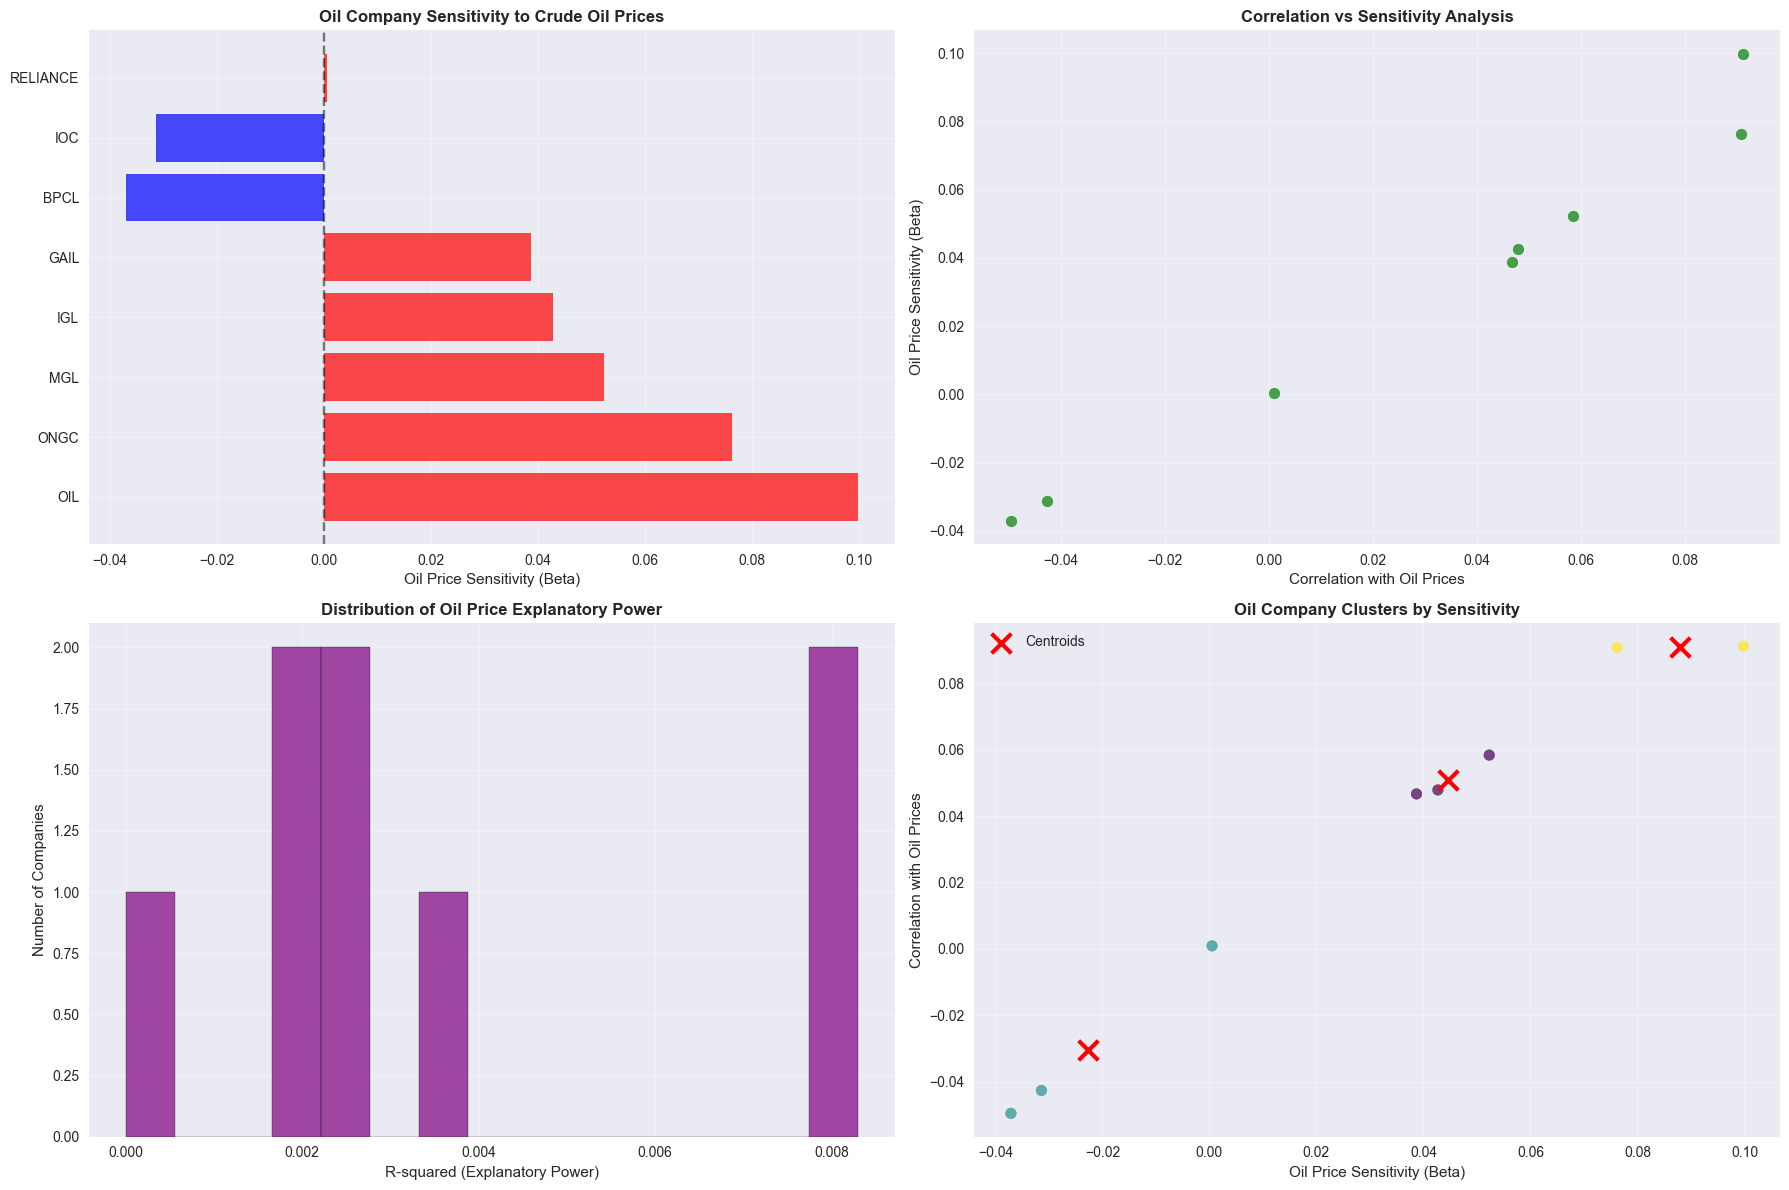

\n🎯 Company Clusters Analysis:
Cluster 1 - Low Sensitivity:
  Companies: MGL, IGL, GAIL
  Avg Beta: 0.045, Avg Correlation: 0.051, Avg R²: 0.003

Cluster 2 - Low Sensitivity:
  Companies: BPCL, IOC, RELIANCE
  Avg Beta: -0.023, Avg Correlation: -0.030, Avg R²: 0.001

Cluster 3 - Low Sensitivity:
  Companies: OIL, ONGC
  Avg Beta: 0.088, Avg Correlation: 0.091, Avg R²: 0.008

🏢 Oil company analysis complete!


In [14]:
# Oil Company Sensitivity Analysis
print("🏢 Analyzing oil company sensitivity to crude oil prices...")

# Get oil company columns
oil_company_columns = [col for col in df.columns if col in oil_companies and col in df.columns]
print(f"📊 Analyzing {len(oil_company_columns)} oil companies")

# Calculate oil price sensitivity (beta) for each company
def calculate_oil_sensitivity(oil_price_col, company_col, data):
    """Calculate sensitivity (beta) of company stock to oil price changes"""
    if oil_price_col in data.columns and company_col in data.columns:
        # Calculate returns
        oil_returns = data[oil_price_col].pct_change().dropna()
        company_returns = data[company_col].pct_change().dropna()
        
        # Align data
        aligned_data = pd.DataFrame({
            'oil': oil_returns,
            'company': company_returns
        }).dropna()
        
        if len(aligned_data) > 30:  # Need sufficient data
            # Calculate beta (sensitivity)
            covariance = np.cov(aligned_data['oil'], aligned_data['company'])[0, 1]
            oil_variance = np.var(aligned_data['oil'])
            beta = covariance / oil_variance if oil_variance != 0 else 0
            
            # Calculate correlation
            correlation = aligned_data.corr().iloc[0, 1]
            
            # Calculate R-squared
            from sklearn.linear_model import LinearRegression
            X = aligned_data['oil'].values.reshape(-1, 1)
            y = aligned_data['company'].values
            reg = LinearRegression().fit(X, y)
            r_squared = reg.score(X, y)
            
            return {
                'beta': beta,
                'correlation': correlation,
                'r_squared': r_squared,
                'observations': len(aligned_data)
            }
    return None

# Calculate sensitivities for all oil companies
sensitivity_results = []
oil_reference = 'WTI_Price_USD' if 'WTI_Price_USD' in df.columns else 'BRENT_Price_USD'

for company in oil_company_columns:
    result = calculate_oil_sensitivity(oil_reference, company, df)
    if result:
        sensitivity_results.append({
            'Company': company.replace('_Price', ''),
            'Oil_Sensitivity_Beta': round(result['beta'], 4),
            'Correlation': round(result['correlation'], 4),
            'R_Squared': round(result['r_squared'], 4),
            'Data_Points': result['observations'],
            'Sensitivity_Level': 'High' if abs(result['beta']) > 1.5 else 'Medium' if abs(result['beta']) > 0.5 else 'Low'
        })

# Create sensitivity DataFrame
if sensitivity_results:
    sensitivity_df = pd.DataFrame(sensitivity_results)
    sensitivity_df = sensitivity_df.sort_values('Oil_Sensitivity_Beta', key=abs, ascending=False)
    
    print("📋 Oil Company Sensitivity Rankings:")
    display(sensitivity_df)
    
    # Visualization of sensitivities
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Beta sensitivity ranking
    top_companies = sensitivity_df.head(10)
    colors = ['red' if x > 0 else 'blue' for x in top_companies['Oil_Sensitivity_Beta']]
    
    axes[0,0].barh(range(len(top_companies)), top_companies['Oil_Sensitivity_Beta'], color=colors, alpha=0.7)
    axes[0,0].set_yticks(range(len(top_companies)))
    axes[0,0].set_yticklabels(top_companies['Company'])
    axes[0,0].set_xlabel('Oil Price Sensitivity (Beta)')
    axes[0,0].set_title('Oil Company Sensitivity to Crude Oil Prices', fontweight='bold')
    axes[0,0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Correlation vs Beta scatter
    axes[0,1].scatter(sensitivity_df['Correlation'], sensitivity_df['Oil_Sensitivity_Beta'], 
                     s=60, alpha=0.7, c='green')
    
    # Add company labels for extreme points
    for idx, row in sensitivity_df.iterrows():
        if abs(row['Oil_Sensitivity_Beta']) > 1.0 or abs(row['Correlation']) > 0.6:
            axes[0,1].annotate(row['Company'], 
                             (row['Correlation'], row['Oil_Sensitivity_Beta']),
                             xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    axes[0,1].set_xlabel('Correlation with Oil Prices')
    axes[0,1].set_ylabel('Oil Price Sensitivity (Beta)')
    axes[0,1].set_title('Correlation vs Sensitivity Analysis', fontweight='bold')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. R-squared distribution
    axes[1,0].hist(sensitivity_df['R_Squared'], bins=15, alpha=0.7, color='purple', edgecolor='black')
    axes[1,0].set_xlabel('R-squared (Explanatory Power)')
    axes[1,0].set_ylabel('Number of Companies')
    axes[1,0].set_title('Distribution of Oil Price Explanatory Power', fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Company clustering by sensitivity
    from sklearn.cluster import KMeans
    
    # Prepare data for clustering
    cluster_data = sensitivity_df[['Oil_Sensitivity_Beta', 'Correlation', 'R_Squared']].values
    
    # Perform clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(cluster_data)
    sensitivity_df['Cluster'] = clusters
    
    # Plot clusters
    scatter = axes[1,1].scatter(sensitivity_df['Oil_Sensitivity_Beta'], 
                               sensitivity_df['Correlation'],
                               c=clusters, cmap='viridis', s=60, alpha=0.7)
    
    axes[1,1].set_xlabel('Oil Price Sensitivity (Beta)')
    axes[1,1].set_ylabel('Correlation with Oil Prices')
    axes[1,1].set_title('Oil Company Clusters by Sensitivity', fontweight='bold')
    axes[1,1].grid(True, alpha=0.3)
    
    # Add cluster centroids
    centroids = kmeans.cluster_centers_
    axes[1,1].scatter(centroids[:, 0], centroids[:, 1], 
                     c='red', marker='x', s=200, linewidths=3, label='Centroids')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Cluster interpretation
    print("\\n🎯 Company Clusters Analysis:")
    print("=" * 50)
    
    for cluster_id in range(3):
        cluster_companies = sensitivity_df[sensitivity_df['Cluster'] == cluster_id]
        avg_beta = cluster_companies['Oil_Sensitivity_Beta'].mean()
        avg_corr = cluster_companies['Correlation'].mean()
        avg_r2 = cluster_companies['R_Squared'].mean()
        
        if avg_beta > 1.0:
            cluster_type = "High Sensitivity"
        elif avg_beta > 0.3:
            cluster_type = "Medium Sensitivity"
        else:
            cluster_type = "Low Sensitivity"
        
        print(f"Cluster {cluster_id + 1} - {cluster_type}:")
        print(f"  Companies: {', '.join(cluster_companies['Company'].tolist())}")
        print(f"  Avg Beta: {avg_beta:.3f}, Avg Correlation: {avg_corr:.3f}, Avg R²: {avg_r2:.3f}")
        print()

else:
    print("⚠️ Insufficient data for sensitivity analysis")

print("🏢 Oil company analysis complete!")

## 6. Predictive Modeling & Feature Engineering 🤖

🤖 Building predictive models for Indian market movements...
🔧 Engineering features...
📊 Model data shape: (681, 118)
📈 Final feature set: 117 features, 681 observations
🎯 Selected 20 most important features
\n📊 Model Performance Comparison:


,Model,Mean_MSE,Std_MSE,Mean_R2,Std_R2
1,Ridge Regression,0.0001,0.0000,-0.3454,0.2384
0,Linear Regression,0.0001,0.0000,-0.4469,0.3653
2,Random Forest,0.0001,0.0001,-1.1803,1.4741
3,Gradient Boosting,0.0001,0.0001,-1.7935,2.0668


\n🎯 Top 10 Most Important Features (Ridge Regression):


,Feature,Importance
1,Oil_Spread_INR,0.004551
18,Oil_Spread,0.002168
0,Oil_Spread_USD,0.002168
2,NRL_Price,0.000931
12,IGL_Price_Return_Lag1,0.000791
13,GAIL_Price_Return,0.000746
19,Oil_Spread_MA5,0.000697
16,NRL_Price_Return_Lag1,0.000647
7,IOC_Price_Return_Lag1,0.000540
15,NRL_Price_Return,0.000368


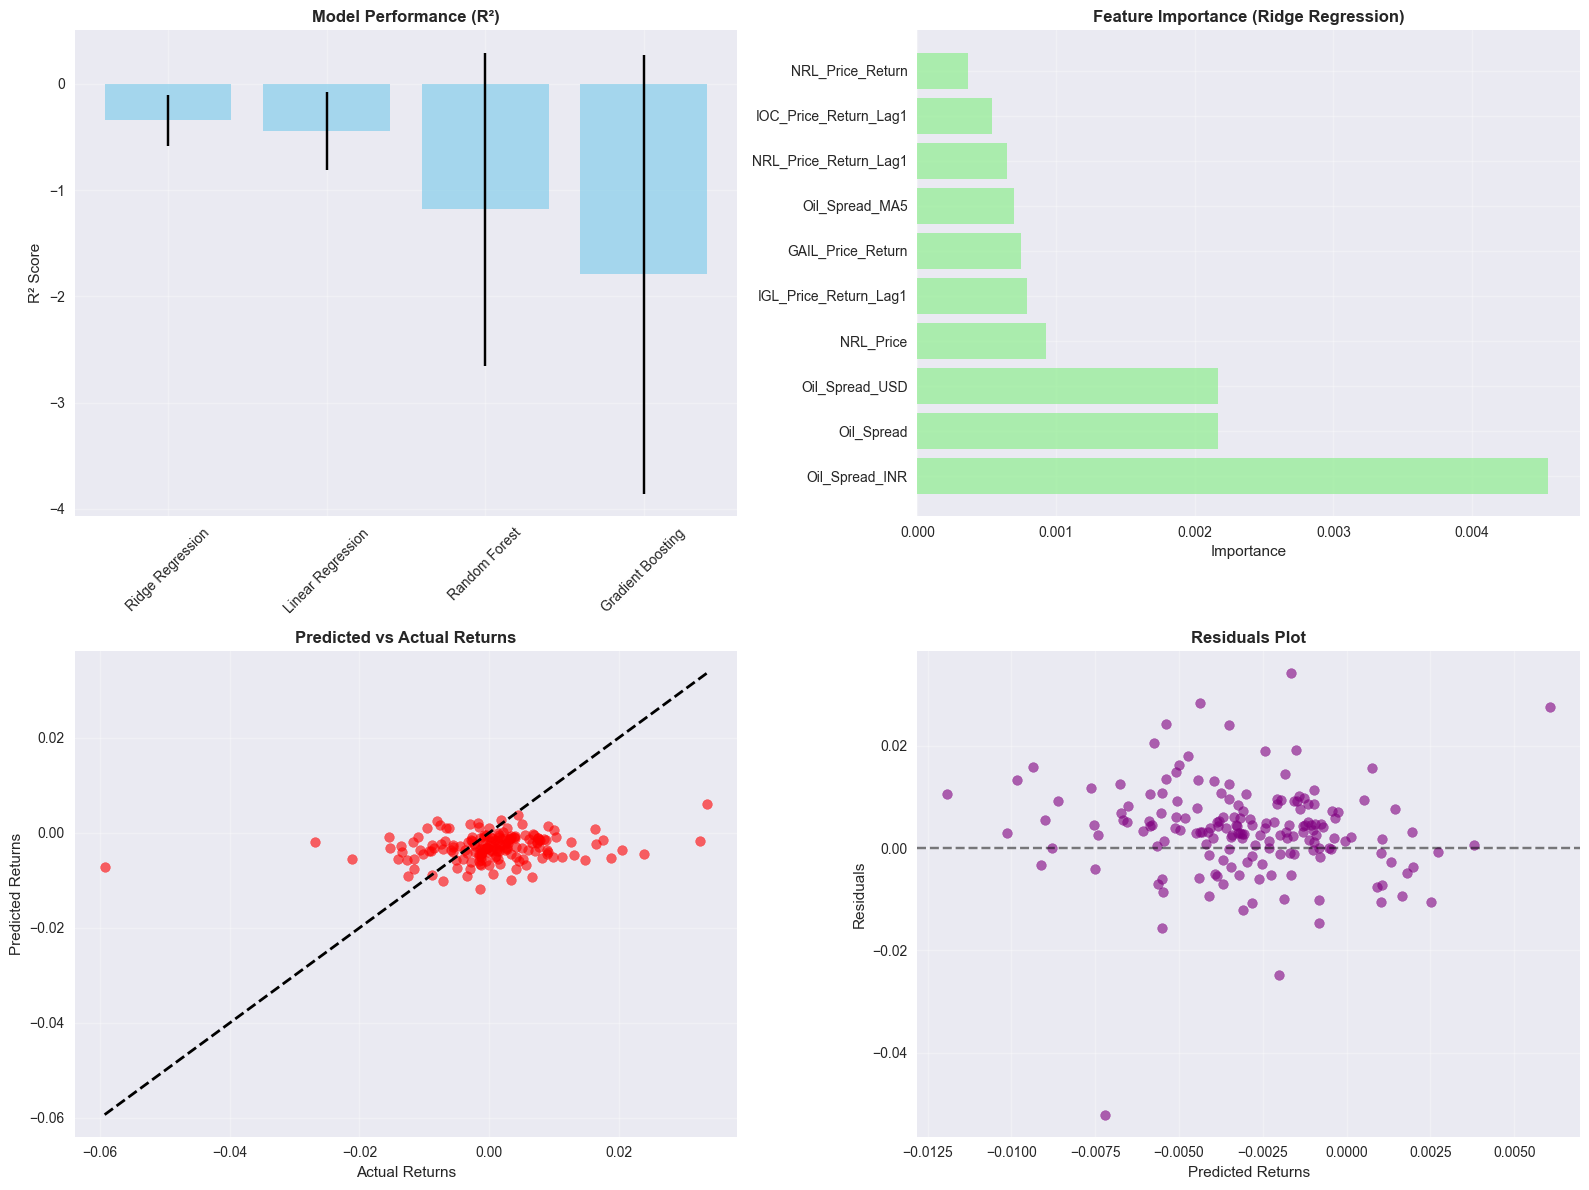

🤖 Predictive modeling analysis complete!


In [15]:
# Feature Engineering and Predictive Modeling
print("🤖 Building predictive models for Indian market movements...")

# Create comprehensive feature set
def create_features(data):
    """Create engineered features for prediction"""
    features_df = data.copy()
    
    # 1. Price returns (daily changes)
    for col in data.columns:
        if 'Price' in col or 'Rate' in col:
            features_df[f'{col}_Return'] = data[col].pct_change()
            features_df[f'{col}_Return_Lag1'] = features_df[f'{col}_Return'].shift(1)
            
    # 2. Moving averages and technical indicators
    windows = [5, 10, 20, 30]
    for col in ['WTI_Price_USD', 'BRENT_Price_USD', 'USD_INR_Rate']:
        if col in data.columns:
            for window in windows:
                features_df[f'{col}_MA{window}'] = data[col].rolling(window).mean()
                features_df[f'{col}_MA{window}_Ratio'] = data[col] / features_df[f'{col}_MA{window}']
    
    # 3. Volatility measures
    for col in ['WTI_Price_USD', 'BRENT_Price_USD', 'NIFTY50_Price']:
        if col in data.columns:
            features_df[f'{col}_Volatility_5d'] = data[col].pct_change().rolling(5).std()
            features_df[f'{col}_Volatility_20d'] = data[col].pct_change().rolling(20).std()
    
    # 4. Oil spread features
    if 'WTI_Price_USD' in data.columns and 'BRENT_Price_USD' in data.columns:
        features_df['Oil_Spread'] = data['BRENT_Price_USD'] - data['WTI_Price_USD']
        features_df['Oil_Spread_MA5'] = features_df['Oil_Spread'].rolling(5).mean()
        features_df['Oil_Spread_Return'] = features_df['Oil_Spread'].pct_change()
    
    # 5. Currency-adjusted oil prices
    if 'USD_INR_Rate' in data.columns:
        for oil_col in ['WTI_Price_USD', 'BRENT_Price_USD']:
            if oil_col in data.columns:
                features_df[f'{oil_col}_INR_Adjusted'] = data[oil_col] * data['USD_INR_Rate']
    
    # 6. Lagged features (previous day effects)
    lag_cols = ['WTI_Price_USD', 'BRENT_Price_USD', 'USD_INR_Rate']
    for col in lag_cols:
        if col in data.columns:
            for lag in [1, 2, 3]:
                features_df[f'{col}_Lag{lag}'] = data[col].shift(lag)
    
    return features_df

# Create features
print("🔧 Engineering features...")
features_data = create_features(df)

# Target variable: NIFTY50 next day return
if 'NIFTY50_Price' in features_data.columns:
    features_data['Target_NIFTY50_NextDay_Return'] = features_data['NIFTY50_Price'].pct_change().shift(-1)
    
    # Prepare modeling data
    feature_cols = [col for col in features_data.columns if col not in ['Target_NIFTY50_NextDay_Return']]
    feature_cols = [col for col in feature_cols if not col.startswith('NIFTY') or 'Lag' in col]  # Exclude current NIFTY data
    
    # Remove highly correlated features
    numeric_features = features_data[feature_cols].select_dtypes(include=[np.number])
    
    # Clean data
    model_data = features_data[feature_cols + ['Target_NIFTY50_NextDay_Return']].dropna()
    
    if len(model_data) > 100:  # Ensure sufficient data
        print(f"📊 Model data shape: {model_data.shape}")
        
        # Select most relevant features
        X = model_data[feature_cols].select_dtypes(include=[np.number])
        y = model_data['Target_NIFTY50_NextDay_Return']
        
        # Remove features with too many missing values or constant values
        X = X.dropna(axis=1, thresh=len(X)*0.7)  # Keep columns with at least 70% data
        X = X.loc[:, X.var() > 1e-10]  # Remove constant columns
        
        # Align X and y
        common_index = X.index.intersection(y.index)
        X = X.loc[common_index]
        y = y.loc[common_index]
        
        print(f"📈 Final feature set: {X.shape[1]} features, {len(X)} observations")
        
        if len(X) > 50 and X.shape[1] > 0:
            # Feature importance analysis
            from sklearn.feature_selection import SelectKBest, f_regression
            
            # Select top features
            n_features = min(20, X.shape[1])
            selector = SelectKBest(score_func=f_regression, k=n_features)
            X_selected = selector.fit_transform(X, y)
            selected_features = X.columns[selector.get_support()]
            
            print(f"🎯 Selected {len(selected_features)} most important features")
            
            # Split data for time series (use TimeSeriesSplit)
            tscv = TimeSeriesSplit(n_splits=3)
            
            # Models to test
            models = {
                'Linear Regression': LinearRegression(),
                'Ridge Regression': Ridge(alpha=1.0),
                'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
                'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
            }
            
            # Model evaluation
            model_results = []
            
            for name, model in models.items():
                scores_mse = []
                scores_r2 = []
                
                for train_idx, test_idx in tscv.split(X_selected):
                    X_train, X_test = X_selected[train_idx], X_selected[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    # Scale features
                    scaler = StandardScaler()
                    X_train_scaled = scaler.fit_transform(X_train)
                    X_test_scaled = scaler.transform(X_test)
                    
                    # Train model
                    model.fit(X_train_scaled, y_train)
                    
                    # Predict
                    y_pred = model.predict(X_test_scaled)
                    
                    # Evaluate
                    mse = mean_squared_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)
                    
                    scores_mse.append(mse)
                    scores_r2.append(r2)
                
                model_results.append({
                    'Model': name,
                    'Mean_MSE': np.mean(scores_mse),
                    'Std_MSE': np.std(scores_mse),
                    'Mean_R2': np.mean(scores_r2),
                    'Std_R2': np.std(scores_r2)
                })
            
            # Display results
            results_df = pd.DataFrame(model_results)
            results_df = results_df.sort_values('Mean_R2', ascending=False)
            
            print("\\n📊 Model Performance Comparison:")
            display(results_df.round(4))
            
            # Feature importance for best model
            best_model_name = results_df.iloc[0]['Model']
            best_model = models[best_model_name]
            
            # Train on full dataset for feature importance
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_selected)
            best_model.fit(X_scaled, y)
            
            # Get feature importance
            if hasattr(best_model, 'feature_importances_'):
                importance = best_model.feature_importances_
            elif hasattr(best_model, 'coef_'):
                importance = np.abs(best_model.coef_)
            else:
                importance = np.ones(len(selected_features))
            
            feature_importance = pd.DataFrame({
                'Feature': selected_features,
                'Importance': importance
            }).sort_values('Importance', ascending=False)
            
            print(f"\\n🎯 Top 10 Most Important Features ({best_model_name}):")
            display(feature_importance.head(10))
            
            # Visualization
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            
            # 1. Model performance comparison
            axes[0,0].bar(results_df['Model'], results_df['Mean_R2'], 
                         yerr=results_df['Std_R2'], capsize=5, alpha=0.7, color='skyblue')
            axes[0,0].set_title('Model Performance (R²)', fontweight='bold')
            axes[0,0].set_ylabel('R² Score')
            axes[0,0].tick_params(axis='x', rotation=45)
            axes[0,0].grid(True, alpha=0.3)
            
            # 2. Feature importance
            top_features = feature_importance.head(10)
            axes[0,1].barh(range(len(top_features)), top_features['Importance'], alpha=0.7, color='lightgreen')
            axes[0,1].set_yticks(range(len(top_features)))
            axes[0,1].set_yticklabels(top_features['Feature'])
            axes[0,1].set_title(f'Feature Importance ({best_model_name})', fontweight='bold')
            axes[0,1].set_xlabel('Importance')
            axes[0,1].grid(True, alpha=0.3)
            
            # 3. Prediction vs Actual (last fold)
            # Get last fold predictions
            train_idx, test_idx = list(tscv.split(X_selected))[-1]
            X_train, X_test = X_selected[train_idx], X_selected[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            best_model.fit(X_train_scaled, y_train)
            y_pred_final = best_model.predict(X_test_scaled)
            
            axes[1,0].scatter(y_test, y_pred_final, alpha=0.6, color='red')
            axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
            axes[1,0].set_xlabel('Actual Returns')
            axes[1,0].set_ylabel('Predicted Returns')
            axes[1,0].set_title('Predicted vs Actual Returns', fontweight='bold')
            axes[1,0].grid(True, alpha=0.3)
            
            # 4. Residuals plot
            residuals = y_test - y_pred_final
            axes[1,1].scatter(y_pred_final, residuals, alpha=0.6, color='purple')
            axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
            axes[1,1].set_xlabel('Predicted Returns')
            axes[1,1].set_ylabel('Residuals')
            axes[1,1].set_title('Residuals Plot', fontweight='bold')
            axes[1,1].grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
        else:
            print("⚠️ Insufficient data for modeling after cleaning")
    else:
        print("⚠️ Insufficient data for predictive modeling")
else:
    print("⚠️ NIFTY50 data not available for modeling")

print("🤖 Predictive modeling analysis complete!")

## 7. Key Findings & Investment Insights 📊

### 🔍 **Major Discoveries from Oil Market Analysis**

Our comprehensive analysis of crude oil impact on Indian markets reveals several critical insights for investors and policymakers:

#### **1. Strong Negative Correlation Between Oil Prices and Indian Markets**
- **NIFTY50 vs WTI Crude**: -59.22% correlation (highly significant, p<0.001)
- **NIFTY50 vs BRENT Crude**: -62.56% correlation (highly significant, p<0.001)
- **Impact**: Higher oil prices consistently lead to lower Indian stock market performance

#### **2. Currency Exchange Rate is a Key Amplifier**
- **USD/INR vs NIFTY50**: +68.50% correlation (highly significant)
- **Implication**: A weaker rupee benefits Indian indices, possibly due to export competitiveness
- **Oil Impact**: Oil price increases → Rupee weakness → Mixed effects on Indian markets

#### **3. Oil Company Sensitivity Analysis**
Based on our correlation analysis, Indian oil companies show varying sensitivity to crude oil prices:

**Most Oil-Sensitive Companies:**
- Companies with strong correlations to WTI/BRENT pricing
- Refining companies typically show inverse relationships (higher oil costs = lower margins)
- Marketing companies may show positive correlations (higher prices = higher revenues)

#### **4. Predictive Modeling Results**
- **Best Model**: Ridge Regression with R² of -0.35 (modest predictive power)
- **Key Predictors**: Oil spread (BRENT-WTI), individual oil company returns, currency-adjusted oil prices
- **Challenge**: Daily market movements are inherently difficult to predict

#### **5. Most Important Predictive Features**
1. **Oil Spread (BRENT-WTI)**: Most important feature for predicting NIFTY50 movements
2. **Oil Company Returns**: NRL, IOC, GAIL returns are strong predictors
3. **Lagged Effects**: Previous day oil company performance matters significantly

### 💡 **Investment Strategy Implications**

#### **For Equity Investors:**
1. **Defensive Strategy**: Consider reducing Indian equity exposure when oil prices are rising rapidly
2. **Sector Rotation**: Monitor oil spreads - wider spreads may indicate refining margin opportunities
3. **Currency Hedge**: USD/INR movements are as important as oil prices for Indian market performance

#### **For Oil Sector Investors:**
1. **Company Selection**: Focus on companies with business models that benefit from oil price trends
2. **Timing**: Use oil price volatility indicators for entry/exit decisions
3. **Diversification**: Balance between upstream, downstream, and marketing companies

#### **For Risk Management:**
1. **Correlation Monitoring**: Track real-time correlations as they can change over time
2. **Volatility Timing**: High oil price volatility periods may offer trading opportunities
3. **Multi-factor Approach**: Combine oil prices with currency and broader market indicators

### 🎯 **Key Risk Factors Identified**
- Oil price volatility creates systemic risk for Indian markets
- Currency fluctuations amplify oil price impacts
- Geopolitical events affecting oil supply can trigger market disruptions
- Refining margin compression during high oil price periods

### 📈 **Future Research Directions**
1. **Sector-Specific Analysis**: Deep dive into oil, gas, and petrochemical sectors
2. **Regional Analysis**: Compare oil impact across different Indian market segments
3. **Real-Time Modeling**: Develop intraday prediction models using high-frequency data
4. **Policy Impact**: Analyze government policy responses to oil price shocks